In [1]:
pip install torch torchvision --index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://download.pytorch.org/whl/cpuNote: you may need to restart the kernel to use updated packages.



In [5]:
!git clone https://github.com/guanyingc/PS-FCN.git
%cd PS-FCN


C:\Users\user\CBNU_project\Untitled Folder\PS-FCN


Cloning into 'PS-FCN'...


In [6]:
pip install opencv-python tqdm matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install --upgrade pip

Using cached pip-25.0.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
Note: you may need to restart the kernel to use updated packages.


In [10]:
!sh scripts/download_pretrained_models.sh


scripts/download_pretrained_models.sh: line 7: wget: command not found
scripts/download_pretrained_models.sh: line 7: wget: command not found


In [63]:
import os
import torch
import numpy as np
import cv2
import sys
from models.PS_FCN import PS_FCN


project_path = r"C:\Users\user\CBNU_project\Untitled Folder\PS-FCN"
os.chdir(project_path)
sys.path.append(project_path)

# 경로 설정
input_dir = 'data/sample'       # 샘플 이미지와 lights.txt가 있는 폴더
output_dir = 'results'          # 결과 저장 폴더
os.makedirs(output_dir, exist_ok=True)

# 이미지 불러오기
image_dir = os.path.join(input_dir, 'images')
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])
images = [cv2.imread(os.path.join(image_dir, f)).astype(np.float32) / 255. for f in image_files]
images = np.stack(images, axis=0)  # [N, H, W, C]
images = torch.from_numpy(images).permute(0, 3, 1, 2)  # [N, C, H, W]

# 조명 방향 로딩
light_dirs = np.loadtxt(os.path.join(input_dir, 'light_directions.txt')).astype(np.float32)
light_dirs = torch.from_numpy(light_dirs)

# 모델 불러오기 (입력 채널 수를 6으로 지정해야 pretrained weight와 맞습니다)
model = PS_FCN(c_in=6)

checkpoint = torch.load('data/models/PS-FCN_B_S_32.pth', map_location='cpu')
model.load_state_dict(checkpoint['state_dict'])
model.eval()


# 입력 변형
# 이미지: [N, 3, H, W]
images = images

# 조명 방향: [N, 3] → [N, 3, H, W]
_, _, H, W = images.shape
light_dirs = light_dirs.unsqueeze(-1).unsqueeze(-1).expand(-1, -1, H, W)

# (디버깅용) 출력 확인
print("images shape:", images.shape)         # [N, 3, H, W]
print("light_dirs shape:", light_dirs.shape) # [N, 3, H, W]

# 추론
with torch.no_grad():
    output = model((images, light_dirs))  # [1, 3, H, W] expected

# 출력 후처리
print("output shape:", output.shape)  # [96, 3, H, W]

# 첫 번째 결과만 저장
normal = output[0].permute(1, 2, 0).numpy()  # [H, W, 3]
normal = ((normal + 1.0) / 2.0 * 255.0).astype(np.uint8)
cv2.imwrite(os.path.join(output_dir, 'normal_map.png'), normal)


print("✅ Normal map saved to:", os.path.join(output_dir, 'normal_map.png'))



Conv pad = 1
Conv pad = 1
Conv pad = 1
Conv pad = 1
Conv pad = 1
Conv pad = 1
Conv pad = 1
Conv pad = 1
images shape: torch.Size([96, 3, 512, 612])
light_dirs shape: torch.Size([96, 3, 512, 612])
output shape: torch.Size([96, 3, 512, 612])
✅ Normal map saved to: results\normal_map.png


In [51]:
checkpoint = torch.load('data/models/PS-FCN_B_S_32.pth', map_location='cpu')
print(checkpoint.keys())

dict_keys(['model', 'state_dict'])


In [61]:
print("output shape:", output.shape)

output shape: torch.Size([96, 3, 512, 612])


In [ ]:
#https://github.com/guanyingc/PS-FCN.git

In [64]:
#https://sites.google.com/site/photometricstereodata/single

In [ ]:
#https://huggingface.co/guanyingc/PhotometricStereo_Blobby_Sculpture_Dataset/blob/8547d024bb4e1ecfc9fe4a625f7effb7ef364327/PS-FCN_B_S_32.pth.tar

In [66]:
#https://huggingface.co/guanyingc/PhotometricStereo_Blobby_Sculpture_Dataset/blob/f5249ae69dc44eb3da681b6d3108aa20dccc6404/UPS-FCN_B_S_32.pth.tar

In [67]:
import os
import torch
import numpy as np
import cv2
import sys
from models.PS_FCN import PS_FCN


project_path = r"C:\Users\user\CBNU_project\Untitled Folder\PS-FCN"
os.chdir(project_path)
sys.path.append(project_path)

# 경로 설정
input_dir = 'data/sample'       # 샘플 이미지와 lights.txt가 있는 폴더
output_dir = 'results'          # 결과 저장 폴더
os.makedirs(output_dir, exist_ok=True)

# 이미지 불러오기
image_dir = os.path.join(input_dir, 'images')
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])
images = [cv2.imread(os.path.join(image_dir, f)).astype(np.float32) / 255. for f in image_files]
images = np.stack(images, axis=0)  # [N, H, W, C]
images = torch.from_numpy(images).permute(0, 3, 1, 2)  # [N, C, H, W]

# 조명 방향 로딩
light_dirs = np.loadtxt(os.path.join(input_dir, 'light_directions.txt')).astype(np.float32)
light_dirs = torch.from_numpy(light_dirs)

# 모델 불러오기 (입력 채널 수를 6으로 지정해야 pretrained weight와 맞습니다)
model = PS_FCN(c_in=6)

checkpoint = torch.load('data/models/PS-FCN_B_S_32.pth', map_location='cpu')
model.load_state_dict(checkpoint['state_dict'])
model.eval()


# 입력 변형
# 이미지: [N, 3, H, W]
images = images

# 조명 방향: [N, 3] → [N, 3, H, W]
_, _, H, W = images.shape
light_dirs = light_dirs.unsqueeze(-1).unsqueeze(-1).expand(-1, -1, H, W)

# (디버깅용) 출력 확인
print("images shape:", images.shape)         # [N, 3, H, W]
print("light_dirs shape:", light_dirs.shape) # [N, 3, H, W]

# 추론
with torch.no_grad():
    output = model((images, light_dirs))  # [1, 3, H, W] expected

# output: [N, 3, H, W]
print("output shape:", output.shape)

# 반복문을 통해 각 이미지 저장
for i in range(output.shape[0]):
    normal = output[i].permute(1, 2, 0).numpy()  # [3, H, W] → [H, W, 3]
    normal = ((normal + 1.0) / 2.0 * 255.0).astype(np.uint8)
    save_path = os.path.join(output_dir, f'normal_map_{i:02d}.png')
    cv2.imwrite(save_path, normal)
    print(f"✅ Saved: {save_path}")


Conv pad = 1
Conv pad = 1
Conv pad = 1
Conv pad = 1
Conv pad = 1
Conv pad = 1
Conv pad = 1
Conv pad = 1
images shape: torch.Size([96, 3, 512, 612])
light_dirs shape: torch.Size([96, 3, 512, 612])
output shape: torch.Size([96, 3, 512, 612])
✅ Saved: results\normal_map_00.png
✅ Saved: results\normal_map_01.png
✅ Saved: results\normal_map_02.png
✅ Saved: results\normal_map_03.png
✅ Saved: results\normal_map_04.png
✅ Saved: results\normal_map_05.png
✅ Saved: results\normal_map_06.png
✅ Saved: results\normal_map_07.png
✅ Saved: results\normal_map_08.png
✅ Saved: results\normal_map_09.png
✅ Saved: results\normal_map_10.png
✅ Saved: results\normal_map_11.png
✅ Saved: results\normal_map_12.png
✅ Saved: results\normal_map_13.png
✅ Saved: results\normal_map_14.png
✅ Saved: results\normal_map_15.png
✅ Saved: results\normal_map_16.png
✅ Saved: results\normal_map_17.png
✅ Saved: results\normal_map_18.png
✅ Saved: results\normal_map_19.png
✅ Saved: results\normal_map_20.png
✅ Saved: results\normal_m

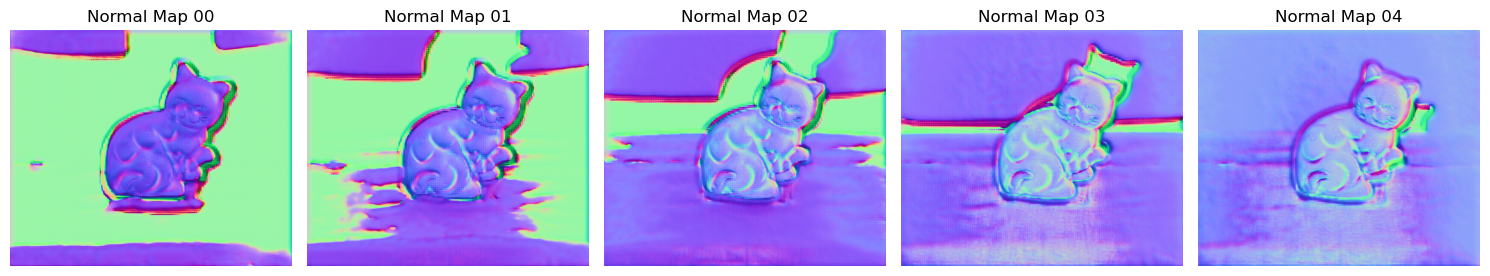

In [68]:
import matplotlib.pyplot as plt

# 시각화용: 한 장 혹은 여러 장 선택
num_to_show = 5  # 최대 몇 장까지 보여줄지 설정

# 한 줄에 여러 장 시각화
plt.figure(figsize=(15, 3))

for i in range(min(num_to_show, output.shape[0])):
    normal = output[i].permute(1, 2, 0).cpu().numpy()  # [3, H, W] → [H, W, 3]
    normal = (normal + 1.0) / 2.0  # [-1, 1] → [0, 1] (matplotlib용)

    plt.subplot(1, num_to_show, i + 1)
    plt.imshow(normal)
    plt.axis('off')
    plt.title(f'Normal Map {i:02d}')

plt.tight_layout()
plt.show()
